In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import statsmodels.api as sm


**Q2**.`A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch .Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.`
 
 


## We are going to conduct a <font color='red'>ANOVA Test</font> on 4 Independent samples with Numerical Data

### We need to check whether the mean of any of these samples are different or the same?

## <font color='red'>Step 1
#### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is want we want to prove

+ **Null Hypothesis:** $\mu_1 = \mu_2$ = $\mu_3$ = $\mu_4$
+ **Alternative Hypthosis:** Atleast One mean is Different

## <font color='red'>Step 2
### Decide a cut-off value

+ **Significance 5%**
+ **alpha = 0.05**

## <font color='red'>Step 3 
### Collect evidence

In [2]:
labTAT=pd.read_csv("LabTAT.csv")

In [3]:
labTAT
labTAT.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [4]:
labTAT.describe()  

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [5]:
labTAT.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [6]:
labTAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


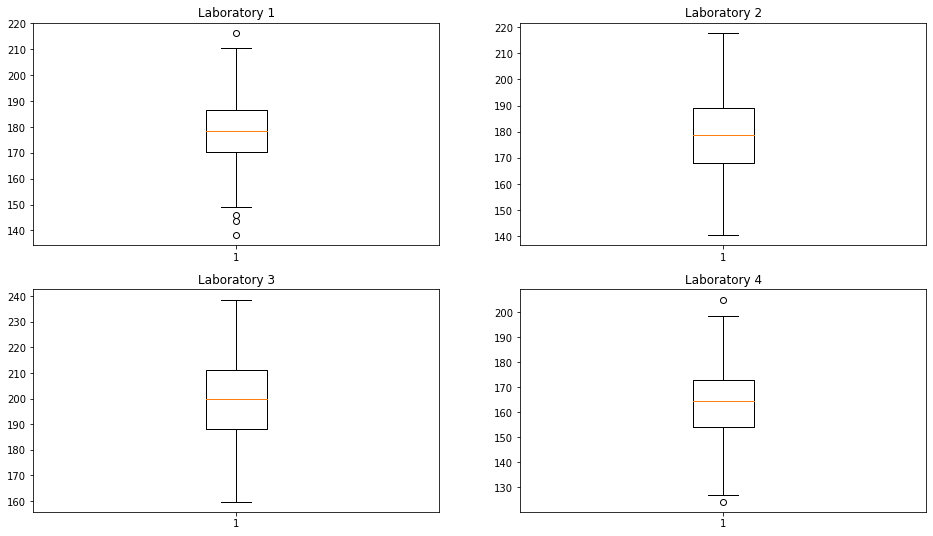

In [7]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(labTAT['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(labTAT['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(labTAT['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(labTAT['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

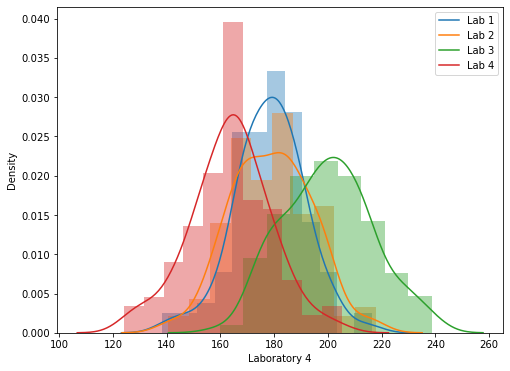

In [8]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(labTAT['Laboratory 1'], hist= True)
sns.distplot(labTAT['Laboratory 2'],hist = True)
sns.distplot(labTAT['Laboratory 3'],hist = True)
sns.distplot(labTAT['Laboratory 4'],hist = True)
plt.legend(labels)

### Plotting Q-Q plot to check whether the distribution follows normal distribution or not

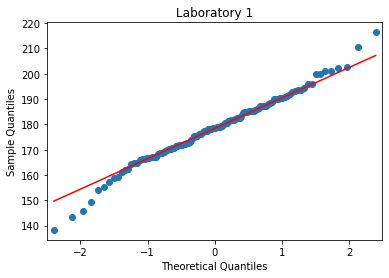

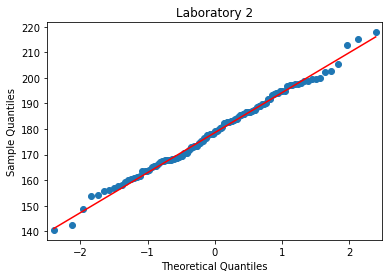

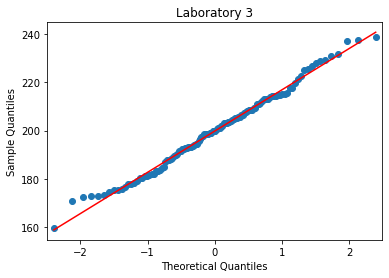

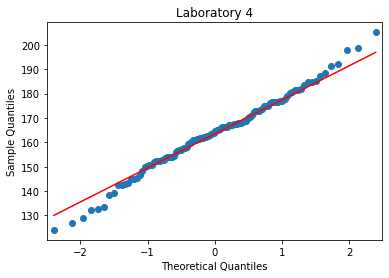

In [9]:
sm.qqplot(labTAT['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(labTAT['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(labTAT['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(labTAT['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

## <font color='red'>Step 4

### Compare Evidences with Hypothesis using t-statictic

In [10]:
test_statistic , p_value = stats.f_oneway(labTAT.iloc[:,0],labTAT.iloc[:,1],labTAT.iloc[:,2],labTAT.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


In [11]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a one mean is different between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a one mean is different between TAT of reports of the laboratories
